# Génération dataset de balises

Ce notebook montre comment le dataset de balises standard est généré : Plusieurs captures de balises ont été effectuées à différentes distances entre 30 cm et 390 cm. chaque mesure a été réalisée 10 fois pour obtenir une meilleure précision sur la forme finale des balises standard. Ici, nous avons extrait chaque balise du nuage de point général obtenu et nous avons calculé une moyenne de chaque mesures.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## extraction des balises des scans lidar

In [168]:
# Loading dataset

pd.options.display.max_rows = 100

NB_SAMPLES = 10
scan_names = ['data_x=120cm_y=0cm.csv', 'data_x=150cm_y=0cm.csv',
              'data_x=180cm_y=0cm.csv', 'data_x=210cm_y=0cm.csv',
              'data_x=240cm_y=0cm.csv', 'data_x=270cm_y=0cm.csv',
              'data_x=300cm_y=0cm.csv', 'data_x=30cm_y=0cm.csv',
              'data_x=330cm_y=0cm.csv', 'data_x=360cm_y=0cm.csv',
              'data_x=390cm_y=0cm.csv', 'data_x=60cm_y=0cm.csv',
              'data_x=90cm_y=0cm.csv']

def extraction_balise (fichier_csv : str,
                       zone_balise_gauche : int, zone_balise_droite : int,
                       zone_balise_bas = -300, zone_balise_haut = 300,
                       nb_sample=0) :
    # fichier_csv : Fichier csv de la balise
    # zone_balise_gauche : limite gauche de la zone d'intérêt (axe x)
    # zone_balise_droite : limite droite de la zone d'intérêt (axe x)
    # zone_balise_bas : limite bas de la zone d'intérêt (axe y)
    # zone_balise_haut : limite haut de la zone d'intérêt (axe y)
    
    # Loading data
    df  = pd.read_csv(fichier_csv)
    
    # Sample number
    if nb_sample == 0 :
        nb_sample = df.iloc[-1,-1] + 1 # last sample number + 1
    
    # Extracting area
    df_extraction = pd.DataFrame(columns=['angle','dist',
                                          'x','y',
                                          'sample'])
    for i in range(df.shape[0]) :
        row = df.iloc[i]
        
        if row['x'] > zone_balise_gauche and row['x'] < zone_balise_droite and row['y'] > zone_balise_bas and row['y'] < zone_balise_haut :
            df_extraction.loc[len(df_extraction)] = row
            #print(row)
            
    return df_extraction

Extraction sur les mesures de la balise à 120cm

In [70]:
extract_df = extraction_balise (scan_names[0], 1100, 1300)
print(extract_df)

        angle    dist            x          y  sample
0   -4.401065  1217.0  1213.411464 -93.389604     0.0
1   -4.048979  1202.0  1198.999873 -84.872280     0.0
2   -3.696894  1191.0  1188.521666 -76.793555     0.0
3   -3.344809  1191.0  1188.971122 -69.488632     0.0
4   -2.992724  1186.0  1184.382501 -61.920038     0.0
..        ...     ...          ...        ...     ...
115 -1.936468  1183.0  1182.324401 -39.975127     9.0
116 -1.584383  1185.0  1184.546961 -32.764279     9.0
117 -1.232298  1192.0  1191.724313 -25.635153     9.0
118 -0.880213  1197.0  1196.858751 -18.388325     9.0
119 -0.528128  1222.0  1221.948088 -11.263709     9.0

[120 rows x 5 columns]


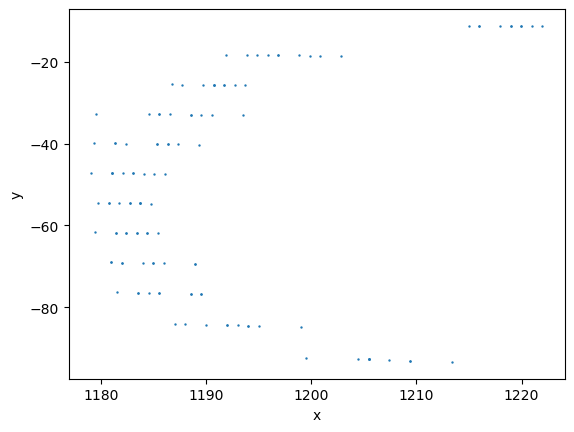

In [165]:
# Ploting data x/y
extract_df.plot(x='x', y='y', kind='scatter',marker='.', s=2)
plt.show()

## Moyenne des mesures de balises

In [178]:
def moy_balise(df_balise_extraite : pd.DataFrame) :
    nb_sample = df_balise_extraite.iloc[-1,-1] + 1 # last sample number + 1
    
    #Rounding y values
    df_round = df_balise_extraite.round(0)
    #print(df_round)
    #count = df_round.groupby(by=["y"]).count()
    #print(count)
    
    #Grouping by  y values and removing outliers
    grouped = df_round.groupby(by=["y"])
    df_filter = grouped.filter(lambda x: x["x"].count()>=int(nb_sample/2))
    #print(df_filter)
    
    #Calculating mean
    group_sum = df_filter.groupby(by=["y"]).mean()
    #print(group_sum)
    return group_sum

       y  angle         dist            x    sample
0  -93.0   -4.0  1210.888889  1206.888889  4.000000
1  -84.0   -4.0  1193.333333  1190.333333  5.500000
2  -77.0   -4.0  1189.857143  1187.857143  3.285714
3  -69.0   -3.0  1186.400000  1184.400000  4.500000
4  -62.0   -3.0  1184.400000  1182.400000  4.500000
5  -55.0   -3.0  1184.571429  1183.571429  4.142857
6  -47.0   -2.0  1183.500000  1182.500000  4.500000
7  -40.0   -2.0  1185.100000  1184.100000  4.500000
8  -33.0   -2.0  1187.700000  1187.700000  4.500000
9  -26.0   -1.0  1190.900000  1190.900000  4.500000
10 -18.0   -1.0  1197.400000  1197.400000  4.500000
11 -11.0   -1.0  1218.600000  1218.600000  4.500000


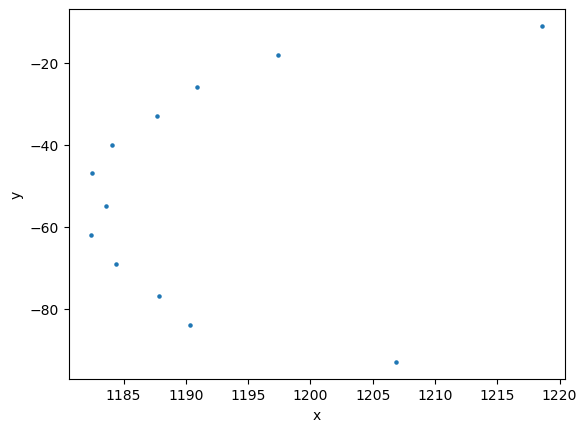

In [180]:
df_balise_standard = moy_balise(extract_df).reset_index()
print(df_balise_standard)

# Ploting data x/y
df_balise_standard.plot(x='x', y='y', kind='scatter',marker='o', s=5)
plt.show()

## Creation du dataset de balises

In [181]:
zone_balise_gauche = [110,140,170,210,230,260,290,20,320,350,380,50,80]
zone_balise_droite = [130,160,190,230,250,280,310,40,340,370,400,70,100]